# Лабораторная работа 

# №6. Дискретное косинусное преобразрвание

## Писарик Максим, 5130901/10101

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.stats import linregress
sys.path.append('../')
from thinkdsp import read_wave, decorate, Spectrogram, UncorrelatedGaussianNoise

## Упражнение 6.1

В этой главе утверждается, что analyze1 требует времени пропорционально
n^3, а analyze2 - пропорционально n^2. Убедимся в этом, запуская их с несколькими разными массивами и засекая время работы.
Если печатать зависимость времени работы от размера на логарифмической шкале, то должна получиться прямая линия с уклоном 3 для analyze1 и с уклоном 2 для analyze2.
Также поупражняемся с dct_iv и scipy.fftpack.dct.

Создадим шумовой сигнал:

In [4]:
signal = UncorrelatedGaussianNoise()
noise = signal.make_wave(duration=1.0, framerate=66666)
noise.ys.shape

(66666,)

Создадим функцию отображения результатов анализа, которая аппроксимирует результат прямой линией:

In [5]:
loglog = dict(xscale='log', yscale='log')

def plot_bests(ns, bests):    
    plt.plot(ns, bests)
    decorate(**loglog)
    
    x = np.log(ns)
    y = np.log(bests)
    t = linregress(x,y)
    slope = t[0]

    return slope
PI2 = np.pi * 2

def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

def run_speed_test(ns, func):
    results = []
    for N in ns:
        print(N)
        ts = (0.5 + np.arange(N)) / N
        freqs = (0.5 + np.arange(N)) / 2
        ys = noise.ys[:N]
        result = %timeit -r1 -o func(ys, freqs, ts)
        results.append(result)
        
    bests = [result.best for result in results]
    return bests

Протестируем. Результаты для analyze1:

64
74.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
250 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
256
1.06 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
512
6.87 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
30.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
152 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
1.18 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.3291860317830593

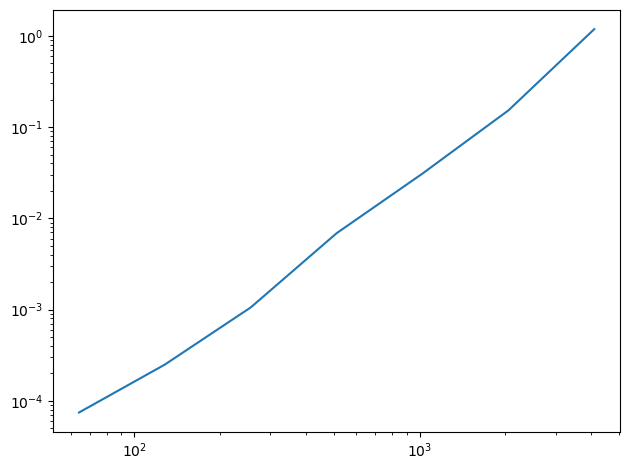

In [6]:
ns = 2 ** np.arange(6, 13)
bests = run_speed_test(ns, analyze1)
plot_bests(ns, bests)

Напишем функцию analyze2:

In [7]:
def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(PI2 * args)
    amps = np.dot(M, ys) / 2
    return amps

Протестируем её:

64
43.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
136 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
256
490 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
512
3.23 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
15.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
64.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
245 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.149461559281853

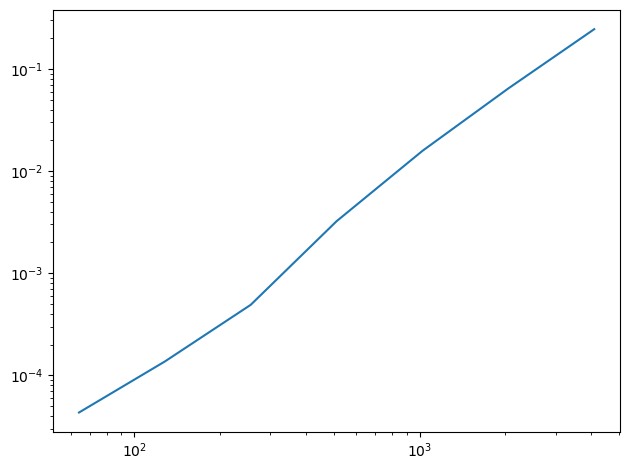

In [8]:
bests2 = run_speed_test(ns, analyze2)
plot_bests(ns, bests2)

Как и ожидалось, в результате получена почти прямая линия с наклоном, близким к 2.

Протестируем scipy.fftpack.dct:

64
6.29 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
128
6.63 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
256
7.03 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
512
8.22 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
1024
10.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
2048
15.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100,000 loops each)
4096
25 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)


0.3173917384436545

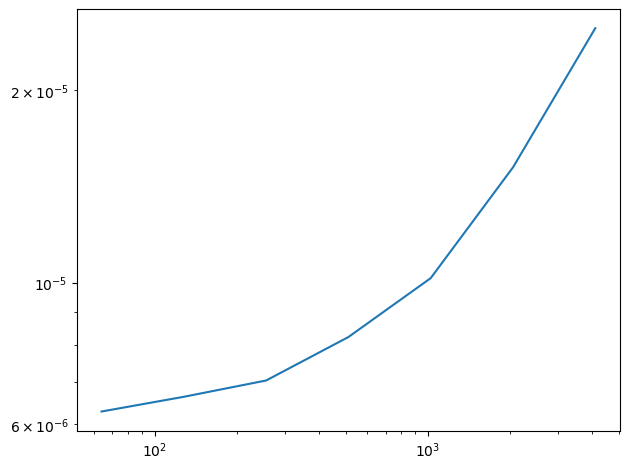

In [9]:
import scipy.fftpack

def scipy_dct(ys, freqs, ts):
    return scipy.fftpack.dct(ys, type=3)
    
bests3 = run_speed_test(ns, scipy_dct)
plot_bests(ns, bests3)

По графику видно, что функция работает быстрее, время её работы пропорционально N * log(N).

Протестируем dct_iv:

64
52.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
128
146 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10,000 loops each)
256
502 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1,000 loops each)
512
3.51 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
15.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
65.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
253 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.1183110854260048

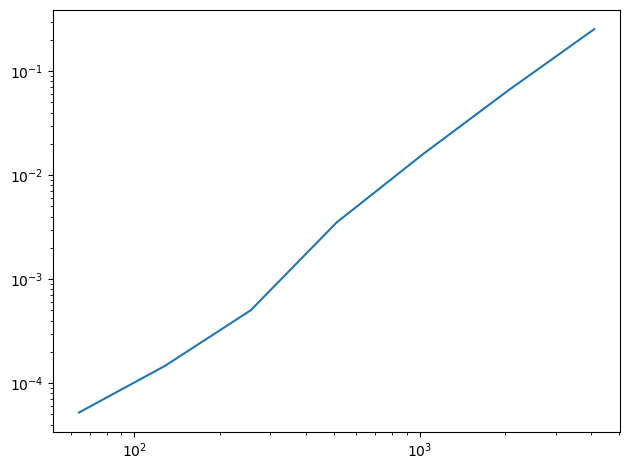

In [10]:
def dct_iv(ys, freqs, ts):
  N = len(ys)
  ts = (0.5 + np.arange(N))/N
  fs = (0.5 + np.arange(N))/2
  args = np.outer(ts,fs)
  M = np.cos(PI2*args)
  amps = np.dot(M, ys) / 2
  return amps

best4 = run_speed_test(ns, dct_iv)
plot_bests(ns, best4)

Результат - линия с наклоном около 1.9.

## Упражнение 6.2

Oдно из основных применений ДКП - это сжатие звука и изображений.
В простейшей форме ДКП при сжатии работает следующим
образом:
1. Разбивает длинный сигнал на сегменты.
2. Вычисляет ДКП каждого сегмента.
3. Определяет частотные компоненты с такой амплитудой, что
их не слышно, и удаляет их, сохраняя только оставшиеся частоты
и амплитуды.
4. При воспроизведении сигнала загружает частоты и амплитуды
каждого сегмента и применяет обратное ДКП.

Реализуем версию этого алгоритма и применим его для записи
музыки или речи. Посмотрим, сколько компонент можно удалить до того, как
разница станет заметной.

Послушаем запись:

In [11]:
wave = read_wave('87778__marcgascon7__vocals.wav')
wave.make_audio()

Извлечём фрагмент:

In [12]:
segment = wave.segment(start=1, duration=0.5)
segment.normalize()
segment.make_audio()

Получим ДКП сигнала:

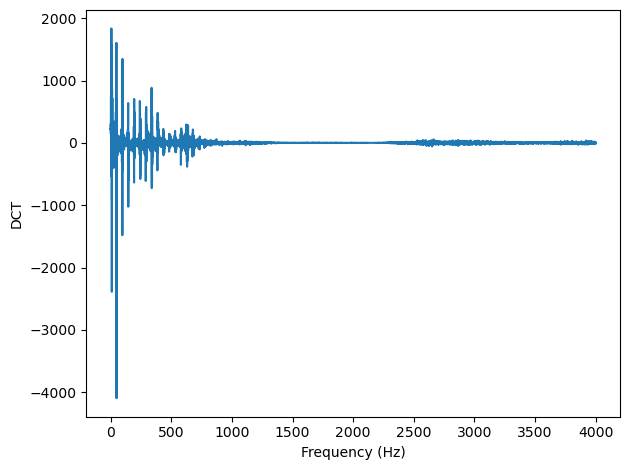

In [13]:
seg_dct = segment.make_dct()
seg_dct.plot(high=4000)
decorate(xlabel='Frequency (Hz)', ylabel='DCT')

Напишем функцию, которая убирает из ДКП частоты со значениями ниже заданного treshold:

In [14]:
def compress(dct, thresh=1):
    count = 0
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < thresh:
            dct.hs[i] = 0
            count += 1
            
    n = len(dct.amps)
    print(count, n, 100 * count / n, sep='\t')

Применим функцию к заданному сигналу:

9146	22050	41.47845804988662


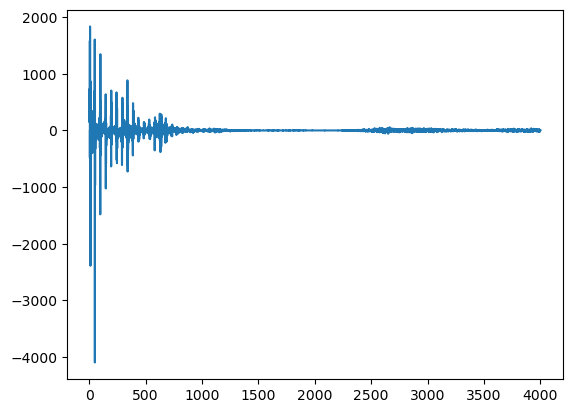

In [15]:
seg_dct = segment.make_dct()
compress(seg_dct, thresh=1)
seg_dct.plot(high=4000)

In [16]:
seg2 = seg_dct.make_wave()
seg2.make_audio()

Звук почти не изменился.
Создадим функцию, которая позволит получить спектрограмму ДКП:

In [17]:
def make_dct_spectrogram(wave, seg_length):
    window = np.hamming(seg_length)
    i, j = 0, seg_length
    step = seg_length // 2

    spec_map = {}

    while j < len(wave.ys):
        segment = wave.slice(i, j)
        segment.window(window)

        t = (segment.start + segment.end) / 2
        spec_map[t] = segment.make_dct()

        i += step
        j += step

    return Spectrogram(spec_map, seg_length)

Теперь можно сжать все сегменты ДСП:

In [18]:
spectro = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectro.spec_map.items()):
    compress(dct, thresh=0.002)

193	1024	18.84765625
85	1024	8.30078125
115	1024	11.23046875
127	1024	12.40234375
108	1024	10.546875
119	1024	11.62109375
83	1024	8.10546875
107	1024	10.44921875
122	1024	11.9140625
101	1024	9.86328125
96	1024	9.375
72	1024	7.03125
102	1024	9.9609375
83	1024	8.10546875
97	1024	9.47265625
119	1024	11.62109375
101	1024	9.86328125
108	1024	10.546875
111	1024	10.83984375
128	1024	12.5
117	1024	11.42578125
114	1024	11.1328125
114	1024	11.1328125
108	1024	10.546875
118	1024	11.5234375
103	1024	10.05859375
107	1024	10.44921875
52	1024	5.078125
99	1024	9.66796875
91	1024	8.88671875
28	1024	2.734375
94	1024	9.1796875
93	1024	9.08203125
117	1024	11.42578125
128	1024	12.5
127	1024	12.40234375
119	1024	11.62109375
123	1024	12.01171875
100	1024	9.765625
122	1024	11.9140625
94	1024	9.1796875
110	1024	10.7421875
118	1024	11.5234375
93	1024	9.08203125
110	1024	10.7421875
74	1024	7.2265625
103	1024	10.05859375
107	1024	10.44921875
116	1024	11.328125
113	1024	11.03515625
110	1024	10.7421875
109	1024	10.

132	1024	12.890625
128	1024	12.5
128	1024	12.5
122	1024	11.9140625
120	1024	11.71875
111	1024	10.83984375
121	1024	11.81640625
116	1024	11.328125
107	1024	10.44921875
131	1024	12.79296875
106	1024	10.3515625
106	1024	10.3515625
120	1024	11.71875
125	1024	12.20703125
119	1024	11.62109375
108	1024	10.546875
116	1024	11.328125
114	1024	11.1328125
116	1024	11.328125
112	1024	10.9375
122	1024	11.9140625
110	1024	10.7421875
110	1024	10.7421875
111	1024	10.83984375
121	1024	11.81640625
112	1024	10.9375
103	1024	10.05859375
128	1024	12.5
123	1024	12.01171875
119	1024	11.62109375
117	1024	11.42578125
121	1024	11.81640625
111	1024	10.83984375
135	1024	13.18359375
111	1024	10.83984375
118	1024	11.5234375
99	1024	9.66796875
116	1024	11.328125
119	1024	11.62109375
119	1024	11.62109375
113	1024	11.03515625
114	1024	11.1328125
137	1024	13.37890625
107	1024	10.44921875
111	1024	10.83984375
130	1024	12.6953125
120	1024	11.71875
128	1024	12.5
107	1024	10.44921875
101	1024	9.86328125
115	1024	11.23046875

In [19]:
wave2 = spectro.make_wave()
wave2.make_audio()

Если увеличить сжатие, то становятся заметны шумы:

In [20]:
spectro = make_dct_spectrogram(wave, seg_length=1024)
for t, dct in sorted(spectro.spec_map.items()):
    compress(dct, thresh=0.1)

952	1024	92.96875
949	1024	92.67578125
945	1024	92.28515625
939	1024	91.69921875
945	1024	92.28515625
951	1024	92.87109375
930	1024	90.8203125
951	1024	92.87109375
935	1024	91.30859375
938	1024	91.6015625
923	1024	90.13671875
900	1024	87.890625
927	1024	90.52734375
905	1024	88.37890625
934	1024	91.2109375
935	1024	91.30859375
948	1024	92.578125
942	1024	91.9921875
952	1024	92.96875
951	1024	92.87109375
944	1024	92.1875
956	1024	93.359375
948	1024	92.578125
951	1024	92.87109375
957	1024	93.45703125
951	1024	92.87109375
953	1024	93.06640625
795	1024	77.63671875
933	1024	91.11328125
926	1024	90.4296875
828	1024	80.859375
826	1024	80.6640625
903	1024	88.18359375
955	1024	93.26171875
957	1024	93.45703125
949	1024	92.67578125
956	1024	93.359375
949	1024	92.67578125
945	1024	92.28515625
941	1024	91.89453125
945	1024	92.28515625
938	1024	91.6015625
942	1024	91.9921875
939	1024	91.69921875
947	1024	92.48046875
926	1024	90.4296875
949	1024	92.67578125
948	1024	92.578125
950	1024	92.7734375
956	1

945	1024	92.28515625
764	1024	74.609375
722	1024	70.5078125
648	1024	63.28125
695	1024	67.87109375
707	1024	69.04296875
735	1024	71.77734375
705	1024	68.84765625
722	1024	70.5078125
752	1024	73.4375
738	1024	72.0703125
748	1024	73.046875
742	1024	72.4609375
745	1024	72.75390625
754	1024	73.6328125
750	1024	73.2421875
764	1024	74.609375
766	1024	74.8046875
779	1024	76.07421875
753	1024	73.53515625
786	1024	76.7578125
807	1024	78.80859375
770	1024	75.1953125
753	1024	73.53515625
766	1024	74.8046875
783	1024	76.46484375
782	1024	76.3671875
764	1024	74.609375
764	1024	74.609375
774	1024	75.5859375
766	1024	74.8046875
763	1024	74.51171875
795	1024	77.63671875
808	1024	78.90625
794	1024	77.5390625
788	1024	76.953125
790	1024	77.1484375
822	1024	80.2734375
869	1024	84.86328125
879	1024	85.83984375
889	1024	86.81640625
899	1024	87.79296875
896	1024	87.5
911	1024	88.96484375
911	1024	88.96484375
917	1024	89.55078125
928	1024	90.625
925	1024	90.33203125
926	1024	90.4296875
928	1024	90.625
926	10

In [21]:
wave2 = spectro.make_wave()
wave2.make_audio()

## Упражнение 6.3
Загрузим и послушаем запись:

In [22]:
wave = read_wave('180960__kleeb__gunshot.wav')
wave.make_audio()

Выделим фрагмент исходной записи:

In [23]:
segment = wave.segment(start=1, duration=0.5)
segment.normalize()
segment.make_audio()

Напишем функции для вывода амплитуды, углов и waveform заданного спектра:

In [24]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency (Hz)', 
             ylabel='Phase (radian)')
    
def plot_three(spectrum, thresh=1):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

Получим данные для изначального сегмента:

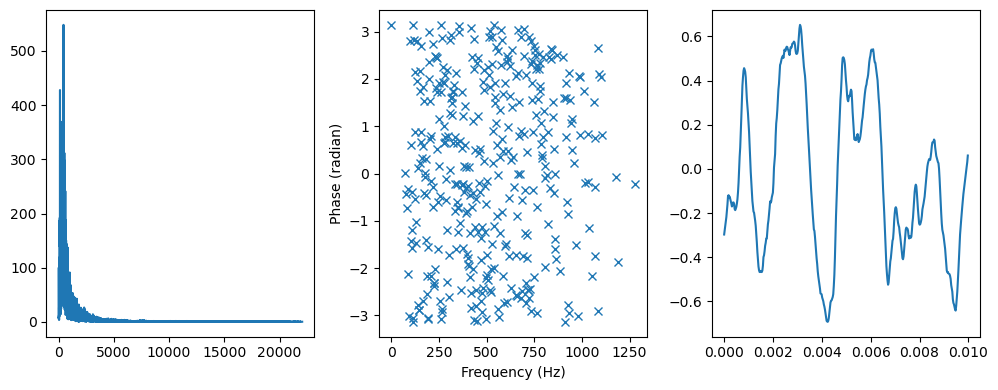

In [25]:
spectrum = segment.make_spectrum()
plot_three(spectrum, thresh=50)

Напишем функцию для обнуления всех углов сегмента:

In [26]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

Протестируем её:

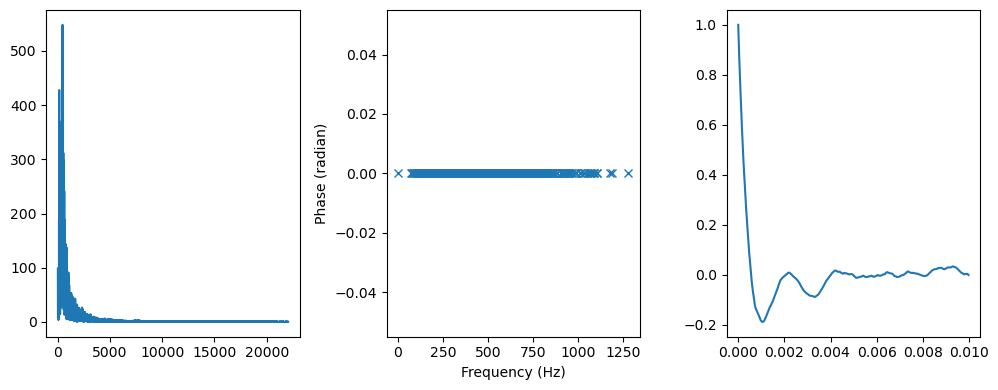

In [27]:
spectrum2 = zero_angle(spectrum)
plot_three(spectrum2, thresh=50)

Запись стала намного тише.

Напишем функцию для поворота углов на 1 радиан и проверим её работу:

In [28]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

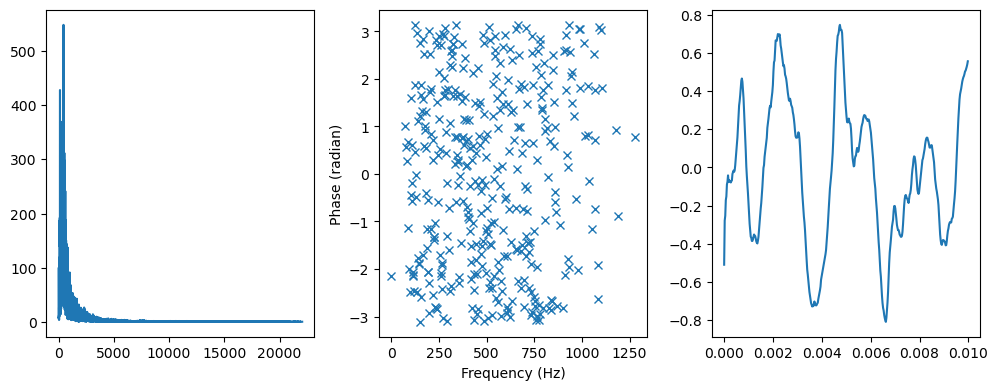

In [29]:
spectrum3 = rotate_angle(spectrum, 1)
plot_three(spectrum3, thresh=50)

На слух звук не изменился.

Создадим функцию для рандомизации углов:

In [30]:
PI2 = np.pi * 2

def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, PI2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

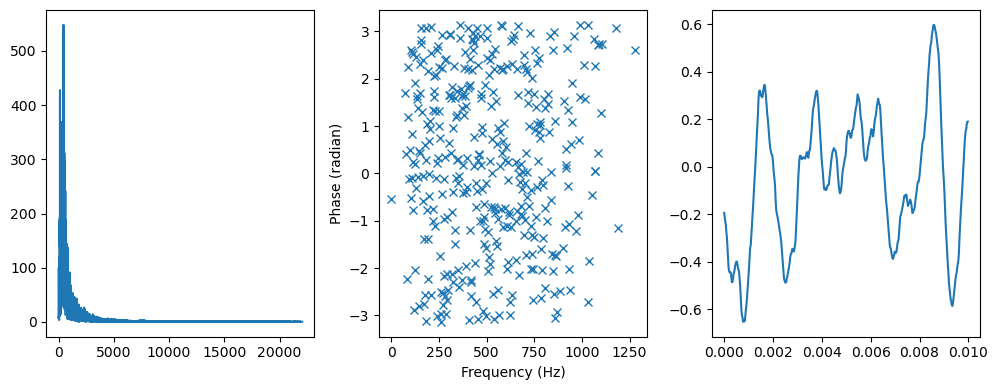

In [31]:
spectrum4 = random_angle(spectrum)
plot_three(spectrum4, thresh=50)

К звуку изначальной записи добавилось эхо.